# Climate Analysis for Surf Shop
---
This notebook is an exploration of the weather patterns in Oahu to make sure the weather is good enough for a surf shop to stay open.

In [1]:
# plotting dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# data analysis dependencies
import numpy as np
import pandas as pd

# other
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create the engine for our sql database
engine = create_engine('sqlite:///hawaii.sqlite')

# set a base class for an automap schema
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect = True)

In [3]:
# check the keys for the class
print(Base.classes.keys())

['measurement', 'station']


In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

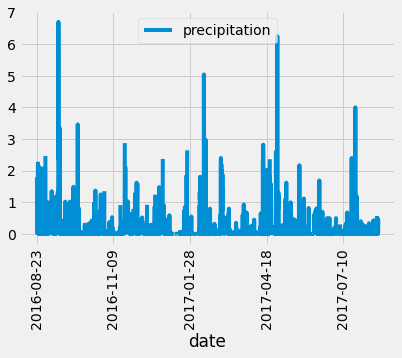

In [5]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date','precipitation'])
results_df.set_index(results_df['date'], inplace = True)
#print(results_df)
#print(results_df.to_string(index = False))

# Sort the dataframe by date
results_df = results_df.sort_index()
#print(results_df.to_string(index = False))

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(rot = 90)

In [6]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [7]:
# How many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [8]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [9]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
print(temps_stats)

[(54.0, 85.0, 71.66378066378067)]


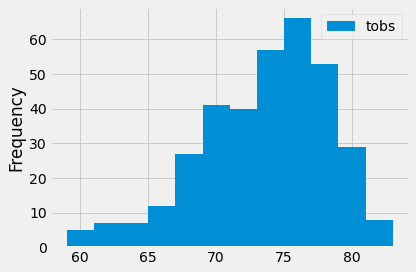

In [10]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()
temps_df = pd.DataFrame(temps, columns = ['tobs'])
temps_df.plot.hist(bins = 12)
plt.tight_layout()

In [11]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge